In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Importing the Data

In [2]:
data = pd.read_csv('ecenter15.csv',index_col=0)

In [3]:
data.head()

,id,dt,event,se_category,se_action,se_property,se_value,page
0,1a6c6ac6ade4d5b4,2019-05-19 19:31:05,page_view,NaN,NaN,NaN,NaN,/cat-mba/online-classes/
1,aafb519f9d47c70a,2019-05-19 19:31:07,page_view,NaN,NaN,NaN,NaN,/cl-online/ProductDesc.jsp
2,1a6c6ac6ade4d5b4,2019-05-19 19:31:05,struct,Leadgen,index,Not Set,0.0,/cat-mba/online-classes/
3,769fd41a41942405,2019-05-19 19:31:06,struct,Head_Icons,Click,1,NaN,/
4,e62ca977fc993ddc,2019-05-19 19:31:09,page_view,NaN,NaN,NaN,NaN,/ca-cs/cs/cs-course.html


### Describing the Data
We use { include='O' } to describe the object variables 

In [4]:
data.describe(include='O')

,id,dt,event,se_category,se_action,se_property,page
count,298633,298633,298633,179311,170257,130862,298633
unique,7007,183923,2,18,113,3084,2098
top,ffd8a99a043a8efd,2019-05-31 12:48:22,struct,Purchase,Init,MBA,/cl-online/ProductDesc.jsp
freq,3397,14,179311,65291,33508,22760,97616


### Exploring the Unique values in all columns

In [5]:
data.event.unique()

array(['page_view', 'struct'], dtype=object)

In [6]:
data.se_category.unique()

array([nan, 'Leadgen', 'Head_Icons', 'Purchase', 'Form Submit',
       'Dimensions', 'TrackVisit', 'ajaxSignIn', 'Nudge', 'Banner',
       'Lead Submit', 'ajaxSignUp', 'All_Programs', 'Debug', 'Chatbot',
       'Connect', 'LeadHooks', 'Notifications', 'SISLogin'], dtype=object)

In [7]:
data.se_action.unique()

array([nan, 'index', 'Click', 'Product Detail', 'Signup', 'Category Page',
       'Signin', 'LST', 'Init', 'na', '1632', 'MBA', 'Add to Cart',
       'Show', 'Success', 'Purchase', '1626', '1628', 'FREE ZONE',
       'Type Page', 'CBSE', 'Submited', 'CAT Repeater', 'BANKING',
       '1632 - Disabled', 'Revised CAT-MBA explorer landing',
       'Civils test series', 'SSC', 'AFTER-12', 'GRE', 'localStorage',
       'RBI', 'PSU', 'Submitted', 'CIVIL_SERVICE', 'GMAT',
       'SSC TS homepage', 'BANKING TS', 'IPM Books & Material', 'MEDICAL',
       'IPM Online Coaching', 'ENGG', 'CLASS-10', 'ETEN IAS', 'FMAP',
       'OTHER', 'New Free User Registration', '1628 - Disabled',
       'DATA ANALYTICS', 'CS', 'GMAT_Webinar_20_May', 'IIM Profilizer',
       'FinSchool', 'SIGNUP', 'FORMS', 'CA CS - CA Foundation',
       'Medical Beginners Guide', 'CAT Citywise campaign', 'IPM',
       'DataSchool', 'Live-Classes-JEE-2021', 'SKILLS', 'CAT', 'COURSES',
       '1626 - Disabled', 'Olympiad-signup', 

In [8]:
data.se_property.unique()

array([nan, 'Not Set', '1', ..., 'sushmitadas827@gmail.com',
       'pradeepsomvanshi838@gmail.com', 'allurisuresh49@gmail.com'],
      dtype=object)

In [9]:
data[data['se_category']=='Purchase'].se_action.unique()

array(['Product Detail', 'Init', 'Add to Cart', 'Success'], dtype=object)

### Cleaning the Data

We need to fetch the Courses names from se_property columns. To do so, we remove the all the email-ids in this column.

So, we remove all the values with '@' in them from se_property and fetch unique categories.

In [10]:
prop = data['se_property'].copy()
prop.dropna(inplace=True)

category = []
for item in prop:
    if '@' not in item:
        category.append(item)

category = np.array(category)
category = np.unique(category)

In [11]:
category

array([' PG Engg ', ' SSC', '/cat-mba/', '/cl-online/ProductDesc.jsp',
       '1', '10225875', '11395000', '11395138', '11395812', '11396037',
       '1632', '2', '2320', '2442', '2567', '2594', '2616', '3', '4',
       '4163', '4182', '4183', '5', '6', '670', '6981', '7',
       '70021016005', '706', '8', '9005030113', '9816285503',
       'ADREETA GUHA ', 'AFTER-12', 'ASD', 'Aakash', 'Anjalilakhotia',
       'Ashwathmanickam', 'BANKING', 'BOOKS', 'Banking', 'Bantisangwan',
       'CA', 'CIVIL_SERVICE', 'CLASS-10', 'CLASS-11', 'CLASS-12',
       'CLASS-8', 'CLASS-9', 'CORRESPONDENCE', 'CR', 'CRT', 'CS',
       'DATA ANALYTICS', 'E-LEARNING', 'ENGG', 'FMAP', 'FORMS', 'Failure',
       'FinSchool', 'FinSchool - 1', 'GATE', 'GKP', 'GMAT', 'GRE', 'HOME',
       'IELTS', 'INSTITUTIONAL', 'IPSITA_AUTHENTIC', 'JOBS',
       'Krishna Lohia', 'Kumarir', 'LEAD_GEN', 'LST', 'LST4#',
       'Loharausmanabad', 'M-APP', 'MBA', 'MBA-CUST-CR-2',
       'MBA-CUST-TS-2', 'MBA-CUST-TS-4', 'MBA-CUST-TS-5

Here we count the total number of unique ids that exist in our data(whether a customer or not).

In [12]:
unique_ids = data['id']
unique_ids = np.array(unique_ids)
unique_ids = np.unique(unique_ids)

In [13]:
unique_ids.shape

(7007,)

Now, we speculate that cookie-ids with multiple registered email-ids are possible cyber cafes or library computers. So, we need to remove such ids from our data as they would hamper the working of our model.

Now, we count the number of email ids registered per each unique id.

In [14]:
emails_per_id = dict((k,set()) for k in unique_ids)
for index,row in data.iterrows():
    if '@' in str(row[5]):
        emails_per_id[row[0]].add(row[5])

In [15]:
new_dict = dict((k,int) for k in unique_ids)
for key,value in emails_per_id.items():
    if isinstance(value,set):
        new_dict[key] = len(value)

Printing the ids with the number the of unique registered email-ids with them.

In [16]:
sorted(new_dict.items(), key=lambda x: x[1], reverse=True)[:20]

[('22198238dd63b042', 27),
 ('81b0aefa7fcd07c8', 16),
 ('d10d12eb74b2094a', 14),
 ('1ead11c9bed82400', 11),
 ('74997a7f5f22904b', 11),
 ('ffd8a99a043a8efd', 11),
 ('198ca6723b47e0d0', 9),
 ('2b6235d74de5d459', 7),
 ('7041c69a60a90f1a', 7),
 ('288470d05fc9d054', 6),
 ('3ca3fbbc111d93b1', 6),
 ('8778cde4d652d0ae', 6),
 ('9917beae4d154d31', 6),
 ('6c28af038b1dfe3d', 5),
 ('73b2d2621f835003', 5),
 ('9a0c3dbf9b0d2c7c', 5),
 ('9d43a6833344e065', 5),
 ('a9fd043388635ee3', 5),
 ('cce22fff0e20a29f', 5),
 ('e65149377d29c99d', 5)]

Now we count the number of purchase ids that exist when we set a limit to the maximum number of email-ids a cookie id can be registered with.

In [17]:
max_ids = [9,8,7,6,5,4,3,2,1]
for i in max_ids:
    new_list = []
    for key,value in new_dict.items():
        if value<=i:
            new_list.append(key)
    new_data = data[data['id'].isin(new_list)]
    success_data = new_data[(data['se_category']=='Purchase')&(data['se_action']=='Success')]
    success_ids = success_data['id'].unique()
    success_ids = success_ids.tolist()
    print('For a limit of maximum',i,' registered email-ids per cookie id, we have ',len(success_ids),' unique success cookie ids.')

For a limit of maximum 9  registered email-ids per cookie id, we have  683  unique success cookie ids.
For a limit of maximum 8  registered email-ids per cookie id, we have  683  unique success cookie ids.
For a limit of maximum 7  registered email-ids per cookie id, we have  683  unique success cookie ids.
For a limit of maximum 6  registered email-ids per cookie id, we have  683  unique success cookie ids.
For a limit of maximum 5  registered email-ids per cookie id, we have  682  unique success cookie ids.
For a limit of maximum 4  registered email-ids per cookie id, we have  682  unique success cookie ids.
For a limit of maximum 3  registered email-ids per cookie id, we have  680  unique success cookie ids.
For a limit of maximum 2  registered email-ids per cookie id, we have  667  unique success cookie ids.
For a limit of maximum 1  registered email-ids per cookie id, we have  589  unique success cookie ids.


Selecting the max number of email ids permissible per user id

Since we see a drastic fall in number of success ids for n<=2 and n<=1.
So we settle for n<=3 as our limit, without losing any generality.

In [18]:
new_list = []
for key,value in new_dict.items():
    if value<=3:
        new_list.append(key)
new_data = data[data['id'].isin(new_list)]
success_data = new_data[(data['se_category']=='Purchase')&(data['se_action']=='Success')]
success_ids = success_data['id'].unique()
success_ids = success_ids.tolist()
print(len(success_ids))

680


Now, we need to reduce the noise in data by removing ids with few instances.
For this we must come up with a cut-off value for the least number of instances that an id must have to be a part of the training data.

In [19]:
min_ids =  dict(data['id'].value_counts())

min_list = []
cutoff_vals = [4,5,6,7,8,9,10,11,12,13,14]
for i in cutoff_vals:
    for key,value in min_ids.items():
        if value<=i:
            min_list.append(key)
    temp_data = pd.DataFrame({'id':success_ids})
    temp_data['rows'] = temp_data['id'].map(min_ids)
    print('For a cut-off of',i,'instances per unique id, we have',temp_data[temp_data['rows']<=i].shape[0],'success ids to be removed.')

For a cut-off of 4 instances per unique id, we have 0 success ids to be removed.
For a cut-off of 5 instances per unique id, we have 0 success ids to be removed.
For a cut-off of 6 instances per unique id, we have 2 success ids to be removed.
For a cut-off of 7 instances per unique id, we have 2 success ids to be removed.
For a cut-off of 8 instances per unique id, we have 2 success ids to be removed.
For a cut-off of 9 instances per unique id, we have 2 success ids to be removed.
For a cut-off of 10 instances per unique id, we have 2 success ids to be removed.
For a cut-off of 11 instances per unique id, we have 2 success ids to be removed.
For a cut-off of 12 instances per unique id, we have 3 success ids to be removed.
For a cut-off of 13 instances per unique id, we have 3 success ids to be removed.
For a cut-off of 14 instances per unique id, we have 5 success ids to be removed.


Since only 2 unique ids exist with instances less than equal to 6 and made a purchase, so we consider only those ids who have aleast 6 instances in the data.

In [20]:
min_list = []
for key,value in min_ids.items():
    if value>=6:
        min_list.append(key)

In [67]:
## Importing the data again and cleaning it based on previous gained insights.
data = pd.read_csv('ecenter15.csv',index_col=0)
new_data = data[data['id'].isin(new_list)]
new_data = new_data[new_data['id'].isin(min_list)]

In [68]:
cust_data = new_data[new_data['id'].isin(success_ids)].copy()
cust_data.sort_values(['id','dt'], ascending=[True, True], inplace=True)

Extracting dates out of the date-time format and creating a new column for the purchases.

The given timestamps are in the format 'Y-m-d H:M:S'. But for our model, we would be needing only the date of visit. So we will just keep the date part of timestamp in 'dt' variable.

In the given data, a successful purchase is captured by the instances where 'se_category'=='Purchase' and 'se_action'=='Success'. So we will create a new variable 'id2' and mark all the instances with a successful purchase.

In [69]:
cust_data['dt'] = cust_data['dt'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
cust_data['dt'] = cust_data['dt'].dt.date
cust_data['id2']=0
cust_data.loc[(cust_data['se_category']=='Purchase')&(cust_data['se_action']=='Success'),'id2'] = 1

Cleaning the columns and grouping multiple categories together

The unique categories in 'se_property' still have lots of dirty values, even after removing all the email-ids. So, we create a list of categories from the previous list by manual inspection.

In [70]:
Course_specific = ['1632', 'MBA','1626', '1628', 'FREE ZONE', 'CBSE', 'CAT Repeater', 'BANKING',
       '1632 - Disabled', 'Revised CAT-MBA explorer landing',
       'Civils test series', 'SSC', 'AFTER-12', 'GRE',
       'RBI', 'PSU', 'CIVIL_SERVICE', 'GMAT',
       'SSC TS homepage', 'BANKING TS', 'IPM Books & Material', 'MEDICAL',
       'IPM Online Coaching', 'ENGG', 'CLASS-10', 'ETEN IAS', 'FMAP',
       'OTHER', '1628 - Disabled',
       'DATA ANALYTICS', 'CS', 'GMAT_Webinar_20_May', 'IIM Profilizer',
       'FinSchool', 'CA CS - CA Foundation',
       'Medical Beginners Guide', 'CAT Citywise campaign', 'IPM',
       'DataSchool', 'Live-Classes-JEE-2021', 'SKILLS', 'CAT', 'COURSES',
       '1626 - Disabled', 'Olympiad-signup', 'DU JAT preparation', 'CRT',
       'UPSC - GS Foundation - Webinar', 'CBSE - Maths - Class 12','SAT', 'AFTER-12 OC',
       'IPM - PDP', 'AFTER-12 BM',
       'RBI Grade B - Economic & Social Issues', 'CL CA CPT - Testseries',
       'Railway Recruitment Board - RRB JE - OC',
       'gmat_classroom_landing_page', 'CBSE - Maths - Class 10',
       'Live-Classes-NEET-2021', 'IELTS', 'CLASS-12',
       'After12- Test series', 'CA', 'JOBS', 'E-TUTORING',
       'Autogram interview pack', 'DATA', 'RBI Grade B Homepage',
       'PG_ENGG', 'CBSE_aptitude_tests',
       'RBI Grade B Notification', 'E-Books', '5045', '5046',
       '1632 Not Show', '1626 Not Show', '5564', 'TUITIONS',
       '5564 Not Show', '1628 Not Show', '5045 Not Show',
       'CA-CS - CA - Intermediate - Classroom', 'neet2020_strategy',
       '5046 Not Show', 'Admission - Consulting', 'IPM Webinar 010619',
       'UPSC - GS Integrated', '5563', '5562', 'TOEFL']

In [71]:
data_2 = cust_data.copy()

Now we replace the categorical values from each column with an appropriate category name.

* The 'na' values are replaced by a 0,
* The list of course specific categories are labelled as one,
* Label the variations of 'Submit' and 'Signup' categories as one.
* The categories which wont be needed in our model are labelled as 'Other'.

In [72]:
data_2 = data_2.fillna(0)
data_2['se_action'] = data_2['se_action'].replace('na',0)
data_2['se_action'] = data_2['se_action'].replace(Course_specific,'Course_specific')
data_2['se_action'] = data_2['se_action'].replace(['index','Type Page','localStorage','ERR'],'Other')
data_2['se_action'] = data_2['se_action'].replace(['Submitted','Submited'],'Submit')
data_2['se_action'] = data_2['se_action'].replace('SIGNUP','Signup')
data_2['se_category'] = data_2['se_category'].replace(['Head_Icons', 'Form Submit',
       'Dimensions', 'ajaxSignIn', 'Banner', 'Nudge', 'TrackVisit',
       'ajaxSignUp', 'All_Programs', 'Debug', 'Chatbot',
       'Connect', 'LeadHooks', 'Notifications', 'SISLogin'],'Other')
data_2['event'] = data_2['event'].replace('page_view',1)
data_2['event'] = data_2['event'].replace('struct',0)

Now we one-hot encode the required categorical variables and drop the previous columns.

In [73]:
temp_1 = pd.get_dummies(data_2[['se_category']],prefix=['sc'])
temp_2 = pd.get_dummies(data_2[['se_action']],prefix=['sa'])
data_2 = pd.concat([data_2,temp_1,temp_2],axis=1)
data_2.drop(columns=['se_category','se_action','sc_0','sa_0'],inplace=True)

Now, we group the data on the basis of 'id' and 'dt' and sum them up. On summing up, we get the number of times a category was recorded by an id on a day, for all the days that id generated a lead.

In [74]:
data_2 = data_2.groupby(['id','dt'],as_index=False).sum()

We sort the grouped data on the basis of id first and then on date. Doing this ensures us that none of the instances of an id will overlap with that of other ids and the data will remain in chronological order as well.

In [75]:
data_2.sort_values(['id','dt'], ascending=[True, True], inplace=True)

In [76]:
data_2.columns

Index(['id', 'dt', 'event', 'se_value', 'id2', 'sc_Lead Submit', 'sc_Leadgen',
       'sc_Other', 'sc_Purchase', 'sa_Add to Cart', 'sa_Category Page',
       'sa_Click', 'sa_Course_specific', 'sa_Free Trial Registration',
       'sa_Init', 'sa_LST', 'sa_New Free User Registration', 'sa_Other',
       'sa_Product Detail', 'sa_Purchase', 'sa_Show', 'sa_Signin', 'sa_Signup',
       'sa_Submit', 'sa_Success'],
      dtype='object')

In [77]:
data_2.head()

,id,dt,event,se_value,id2,sc_Lead Submit,sc_Leadgen,sc_Other,sc_Purchase,sa_Add to Cart,...,sa_LST,sa_New Free User Registration,sa_Other,sa_Product Detail,sa_Purchase,sa_Show,sa_Signin,sa_Signup,sa_Submit,sa_Success
0,003bf97cb020ba13,2019-05-27,14,300000.0,0,0,2,12,5,0,...,0,0,4,4,0,6,0,0,1,0
1,003bf97cb020ba13,2019-05-28,10,234750.0,0,0,2,8,4,0,...,0,0,4,3,0,3,0,0,1,0
2,003bf97cb020ba13,2019-05-29,5,208500.0,0,0,0,4,6,0,...,0,0,0,4,0,0,0,0,0,0
3,003bf97cb020ba13,2019-05-30,13,24022878.0,1,0,0,16,20,6,...,0,0,0,8,1,0,2,0,0,1
4,00a869cc072924f7,2019-05-27,22,23582879.0,0,0,2,45,11,0,...,0,0,5,5,0,10,13,0,0,0


In [78]:
data_2.drop(columns=['se_value', 'sc_Purchase', 'sa_Category Page', 'sa_Click',
       'sa_Free Trial Registration', 'sa_LST', 'sa_New Free User Registration', 'sa_Other',
       'sa_Purchase', 'sa_Show', 'sa_Signin', 'sa_Signup', 'sa_Submit', 'sa_Success'],inplace=True)

Now we Label Encode all the possible dates in our data so as to get a sequential numeric value for each date relative to the first date in our data which will be encoded as 0.

In [79]:
data_2['id'].unique().shape
unique_cust_id = data_2['id'].unique()

In [80]:
le = preprocessing.LabelEncoder()
data_2['dt'] = le.fit_transform(data_2['dt'])

In [81]:
dates = dict((k,int) for k in unique_cust_id)
for index,row in data_2.iterrows():
    if row['id2']>=1:
        dates[row['id']] = row['dt']
len(dates)

680

Now we map the ids with their date of purchase. 
Also we create a column for relative date of an instance with respect to the date of purchase of that id.
The value of relative date would be 0,-1,-2,-3... for prior to a purchase and would be 1,2,3,4... for days after a purchase.

In [82]:
data_2['pur_date']=0
data_2['pur_date'] = data_2['id'].map(dates)

data_2['rel_date']=0
data_2['rel_date'] = data_2['dt'] - data_2['pur_date']

data_2.drop(columns=['dt','pur_date'], inplace=True)

For our model, we would be using the data for only 5 days prior to a purchase. So, we remove the data with dates before 5 days prior to purchase date and after the date of purchase.

In [83]:
selRows = data_2[data_2['rel_date']>0].index
data_2 = data_2.drop(selRows, axis=0)

selRows = data_2[data_2['rel_date']<-5].index
data_2 = data_2.drop(selRows, axis=0)

data_2['rel_date'] = data_2['rel_date'].astype(str)

In [84]:
data_2.columns

Index(['id', 'event', 'id2', 'sc_Lead Submit', 'sc_Leadgen', 'sc_Other',
       'sa_Add to Cart', 'sa_Course_specific', 'sa_Init', 'sa_Product Detail',
       'rel_date'],
      dtype='object')

Now, we create a pivot table with index as ids and columns as relative dates.
Pivoting a table would result in making columns out of a categorical value in a column. Thus on pivoting on columns as relative date, we get the count of a categorical variable for each id on 5 days prior to a purchase.

In [85]:
pt = pd.pivot_table(data_2, values=['event','sa_Init','sc_Lead Submit',
                                    'sc_Leadgen', 'sc_Other','sa_Add to Cart',
                                    'sa_Course_specific','sa_Product Detail'], index='id', columns='rel_date')
data_3 = pt.reset_index()

In [86]:
data_3.head()

id event                              sa_Add to Cart  \
rel_date                      -1    -2    -3    -4   -5     0             -1   
0         003bf97cb020ba13   5.0  10.0  14.0   NaN  NaN  13.0            0.0   
1         00a869cc072924f7   NaN   NaN   5.0  22.0  NaN  12.0            NaN   
2         00f5802110b0b6c8   NaN   NaN   NaN   NaN  NaN  18.0            NaN   
3         0242ae746a4b7ada   8.0   NaN   7.0   NaN  4.0  11.0            0.0   
4         02874f7a1af27721   NaN   NaN   NaN   NaN  NaN  20.0            NaN   

                    ...  sc_Leadgen                sc_Other                   \
rel_date   -2   -3  ...          -3   -4   -5    0       -1   -2    -3    -4   
0         0.0  0.0  ...         2.0  NaN  NaN  0.0      4.0  8.0  12.0   NaN   
1         NaN  0.0  ...         0.0  2.0  NaN  0.0      NaN  NaN   7.0  45.0   
2         NaN  NaN  ...         NaN  NaN  NaN  2.0      NaN  NaN   NaN   NaN   
3         NaN  0.0  ...         2.0  NaN  0.0  0.0     16.0  NaN  13.0   NaN   
4         NaN  NaN  ...         NaN  NaN  NaN  2.0      NaN  NaN   NaN   NaN   

                     
rel_date   -5     0  
0         NaN  16.0  
1         NaN  27.0  
2         NaN  26.0  
3         6.0  20.0  
4         NaN  31.0  

[5 rows x 49 columns]

Now we count the activity of each signal on the last 5 days prior to purchase. The count is taken as a sum for all ids.

In [87]:
col_names = ['event','sa_Init','sc_Lead Submit','sc_Leadgen','sc_Other','sa_Add to Cart','sa_Course_specific','sa_Product Detail']
for i in col_names:
    print(i,':')
    print(data_3.loc[data_3[i]['-5']>0,i]['-5'].count())
    print(data_3.loc[data_3[i]['-4']>0,i]['-4'].count())
    print(data_3.loc[data_3[i]['-3']>0,i]['-3'].count())
    print(data_3.loc[data_3[i]['-2']>0,i]['-2'].count())
    print(data_3.loc[data_3[i]['-1']>0,i]['-1'].count())
    print(data_3.loc[data_3[i]['0']>0,i]['0'].count())
    print('---------')

event :
32
54
66
91
207
680
---------
sa_Init :
7
29
31
41
133
676
---------
sc_Lead Submit :
2
3
1
4
5
16
---------
sc_Leadgen :
19
34
34
57
135
400
---------
sc_Other :
30
52
63
90
204
680
---------
sa_Add to Cart :
0
1
3
5
24
671
---------
sa_Course_specific :
22
42
40
64
150
565
---------
sa_Product Detail :
13
33
44
63
157
677
---------


In [88]:
sc_o = []
sa_a = []
sa_c = []
sa_p = []
sc_l = []
sc_ls = []
sa_i = []
event = []

for i in ['-5','-4','-3','-2','-1','0']:
    sc_o.append(data_3.loc[data_3['sc_Other'][i]>0,'sc_Other'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_a.append(data_3.loc[data_3['sa_Add to Cart'][i]>0,'sa_Add to Cart'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_c.append(data_3.loc[data_3['sa_Course_specific'][i]>0,'sa_Course_specific'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_p.append(data_3.loc[data_3['sa_Product Detail'][i]>0,'sa_Product Detail'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_l.append(data_3.loc[data_3['sc_Leadgen'][i]>0,'sc_Leadgen'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_ls.append(data_3.loc[data_3['sc_Lead Submit'][i]>0,'sc_Lead Submit'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_i.append(data_3.loc[data_3['sa_Init'][i]>0,'sa_Init'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    event.append(data_3.loc[data_3['event'][i]>0,'event'][i].count())

We can see that the distribution of all these signals is distributed normally about the date of purchase, as expected. The activity for all these signals is maximum on the date of purchase and decreases subsequently.

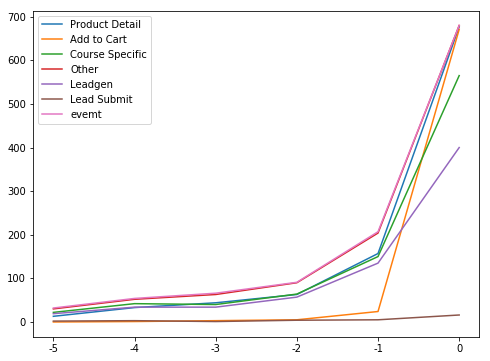

In [89]:
x = ['-5','-4','-3','-2','-1','0']
figure(figsize=(8, 6))
line1, = plt.plot(x,sa_p)
line2, = plt.plot(x,sa_a)
line3, = plt.plot(x,sa_c)
line4, = plt.plot(x,sc_o)
line5, = plt.plot(x,sc_l)
line6, = plt.plot(x,sc_ls)
# line7, = plt.plot(x,sa_i)
line8, = plt.plot(x,event)
plt.legend((line1, line2, line3, line4, line5, line6, line8), ('Product Detail', 'Add to Cart', 'Course Specific', 'Other', 'Leadgen', 'Lead Submit', 'evemt'))
plt.show()

### Similary, we prepare the data for ids who didn't make a purchase

We assume, the last date of the given data as the predicting purchase date for these ids.

In [44]:
pos_data = new_data[~new_data['id'].isin(success_ids)]
pos_data[(pos_data['se_category']=='Purchase')&(pos_data['se_action']=='Success')]

pos_data.sort_values(['id','dt'], ascending=[True, True], inplace=True)
pos_data['dt'] = pos_data['dt'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
pos_data['dt'] = pos_data['dt'].dt.date
pos_data['id2']=0

data_2 = pos_data

data_2 = data_2.fillna(0)
data_2['se_action'] = data_2['se_action'].replace('na',0)
data_2['se_action'] = data_2['se_action'].replace(Course_specific,'Course_specific')
data_2['se_action'] = data_2['se_action'].replace(['index','Type Page','localStorage','ERR'],'Other')
data_2['se_action'] = data_2['se_action'].replace(['Submitted','Submited'],'Submit')
data_2['se_action'] = data_2['se_action'].replace('SIGNUP','Signup')
data_2['se_category'] = data_2['se_category'].replace(['Head_Icons', 'Form Submit',
       'Dimensions', 'ajaxSignIn', 'Banner', 'Nudge', 'TrackVisit',
       'ajaxSignUp', 'All_Programs', 'Debug', 'Chatbot',
       'Connect', 'LeadHooks', 'Notifications', 'SISLogin'],'Other')
temp_1 = pd.get_dummies(data_2[['se_category']],prefix=['sc'])
temp_2 = pd.get_dummies(data_2[['se_action']],prefix=['sa'])
data_2 = pd.concat([data_2,temp_1,temp_2],axis=1)
data_2.drop(columns=['se_category','se_action','sc_0','sa_0'],inplace=True)

data_2['event'] = data_2['event'].replace('page_view',1)
data_2['event'] = data_2['event'].replace('struct',0)

data_2 = data_2.groupby(['id','dt'],as_index=False).sum()
data_2.sort_values(['id','dt'], ascending=[True, True], inplace=True)

data_2.drop(columns=['se_value',
       'sc_Purchase', 'sa_Category Page', 'sa_Click',
       'sa_Free Trial Registration',
       'sa_LST', 'sa_New Free User Registration', 'sa_Other',
       'sa_Purchase', 'sa_Show', 'sa_Signin', 'sa_Signup',
       'sa_Submit','sa_FORMS',],inplace=True)

data_2['id'].unique().shape
unique_cust_id = data_2['id'].unique()

le = preprocessing.LabelEncoder()
data_2['dt'] = le.fit_transform(data_2['dt'])

last_date = np.sort(data_2['dt'].unique())[-1]
last_date

dates = dict((k,int) for k in unique_cust_id)
for index,row in data_2.iterrows():
    dates[row['id']] = last_date
    
data_2['last_date']=0
data_2['last_date'] = data_2['id'].map(dates)
data_2['rel_date']=0
data_2['rel_date'] = data_2['dt'] - data_2['last_date']

data_2.drop(columns=['dt','last_date'], inplace=True)

selRows = data_2[data_2['rel_date']>0].index
data_2 = data_2.drop(selRows, axis=0)
selRows = data_2[data_2['rel_date']<-5].index
data_2 = data_2.drop(selRows, axis=0)

data_2['rel_date'] = data_2['rel_date'].astype(str)

pt2 = pd.pivot_table(data_2, values=['event','sa_Init','sc_Lead Submit','sc_Leadgen','sc_Other','sa_Add to Cart','sa_Course_specific','sa_Product Detail'], index='id', columns='rel_date')
data_4 = pt2.reset_index()

Again, we count the activity of each signal on the last 5 days prior to the predicting date. Though, as anticipated we find that this count is not normalized. The count of these signals does not follow a pattern.

In [45]:
sc_o = []
sa_a = []
sa_c = []
sa_p = []
sc_l = []
sc_ls = []
sa_i = []
event = []
for i in ['-5','-4','-3','-2','-1','0']:
    sc_o.append(data_4.loc[data_4['sc_Other'][i]>0,'sc_Other'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_a.append(data_4.loc[data_4['sa_Add to Cart'][i]>0,'sa_Add to Cart'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_c.append(data_4.loc[data_4['sa_Course_specific'][i]>0,'sa_Course_specific'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_p.append(data_4.loc[data_4['sa_Product Detail'][i]>0,'sa_Product Detail'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_l.append(data_4.loc[data_4['sc_Leadgen'][i]>0,'sc_Leadgen'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_ls.append(data_4.loc[data_4['sc_Lead Submit'][i]>0,'sc_Lead Submit'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_i.append(data_3.loc[data_3['sa_Init'][i]>0,'sa_Init'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    event.append(data_3.loc[data_3['event'][i]>0,'event'][i].count())

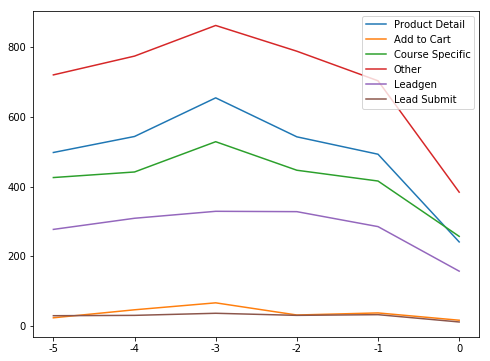

In [46]:
x = ['-5','-4','-3','-2','-1','0']
figure(figsize=(8, 6))
line1, = plt.plot(x,sa_p)
line2, = plt.plot(x,sa_a)
line3, = plt.plot(x,sa_c)
line4, = plt.plot(x,sc_o)
line5, = plt.plot(x,sc_l)
line6, = plt.plot(x,sc_ls)
# line7, = plt.plot(x,sa_i)
# line8, = plt.plot(x,event)
plt.legend((line1, line2, line3, line4, line5, line6), ('Product Detail', 'Add to Cart', 'Course Specific', 'Other', 'Leadgen', 'Lead Submit'))

In [47]:
data_3['result'] = 1
data_4['result'] = 0

Now we flatten the multi index columns we obtained after pivoting the dataframe to get one indexed column names.

In [48]:
data_3.columns = ['_'.join(col).rstrip('_') for col in data_3.columns.values]
data_4.columns = ['_'.join(col).rstrip('_') for col in data_4.columns.values]

In [49]:
data_5 = pd.concat([data_3,data_4])
data_5.fillna(0,inplace=True)

In [50]:
data_5.columns

Index(['id', 'event_-1', 'event_-2', 'event_-3', 'event_-4', 'event_-5',
       'event_0', 'sa_Add to Cart_-1', 'sa_Add to Cart_-2',
       'sa_Add to Cart_-3', 'sa_Add to Cart_-4', 'sa_Add to Cart_-5',
       'sa_Add to Cart_0', 'sa_Course_specific_-1', 'sa_Course_specific_-2',
       'sa_Course_specific_-3', 'sa_Course_specific_-4',
       'sa_Course_specific_-5', 'sa_Course_specific_0', 'sa_Init_-1',
       'sa_Init_-2', 'sa_Init_-3', 'sa_Init_-4', 'sa_Init_-5', 'sa_Init_0',
       'sa_Product Detail_-1', 'sa_Product Detail_-2', 'sa_Product Detail_-3',
       'sa_Product Detail_-4', 'sa_Product Detail_-5', 'sa_Product Detail_0',
       'sc_Lead Submit_-1', 'sc_Lead Submit_-2', 'sc_Lead Submit_-3',
       'sc_Lead Submit_-4', 'sc_Lead Submit_-5', 'sc_Lead Submit_0',
       'sc_Leadgen_-1', 'sc_Leadgen_-2', 'sc_Leadgen_-3', 'sc_Leadgen_-4',
       'sc_Leadgen_-5', 'sc_Leadgen_0', 'sc_Other_-1', 'sc_Other_-2',
       'sc_Other_-3', 'sc_Other_-4', 'sc_Other_-5', 'sc_Other_0', 'result'],

### Building the Model
We split the data into feature vectors and target variable i.e. x and y.

Then we split the resulting data into training and testing data and fit a RandomForestClassifier model.

In [51]:
y = data_5["result"].values
x = data_5[['id','event_-1', 'event_-2', 'event_-3', 'event_-4', 'event_-5',
       'sa_Add to Cart_-1', 'sa_Add to Cart_-2',
       'sa_Add to Cart_-3', 'sa_Add to Cart_-4', 'sa_Add to Cart_-5',
       'sa_Course_specific_-1', 'sa_Course_specific_-2',
       'sa_Course_specific_-3', 'sa_Course_specific_-4',
       'sa_Course_specific_-5','sa_Init_-1',
       'sa_Init_-2', 'sa_Init_-3', 'sa_Init_-4', 'sa_Init_-5',
       'sa_Product Detail_-1', 'sa_Product Detail_-2', 'sa_Product Detail_-3',
       'sa_Product Detail_-4', 'sa_Product Detail_-5']].values

In [52]:
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.25,random_state=0)

In [53]:
test_ids = val_x[:,:1]
test_ids = test_ids.flatten()
train_x = train_x[:,1:]
val_x = val_x[:,1:]

In [54]:
model = RandomForestClassifier()
model.fit(train_x,train_y)
preds = model.predict(val_x)

We save our predictions into the 'preds' variable.

Now we reduce the threshold for predicting values as positive using predicted_proba and set the probability to 0.25. Doing this allows the model to predict a person as a customer at a much lower threshold and thus reducing the False Negatives.

In [55]:
threshold = 0.25
predicted_proba = model.predict_proba(val_x)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

In [56]:
accuracy = accuracy_score(preds,val_y)
accuracy_25 = accuracy_score(val_y, predicted)

In [57]:
print('Accuracy of model =',accuracy)
print('Accuracy of model with lowered threshold =',accuracy_25)

Accuracy of model = 0.8641975308641975
Accuracy of model with lowered threshold = 0.8047138047138047


In [58]:
## Confusion Matrix function
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

We define two classes of people as 'No' ans 'Yes' with respect to whether they will make a purchase or not.

In [59]:
class_names = ['No','Yes']
np.set_printoptions(precision=2)

Confusion Matrix for the model

Confusion matrix, without normalization
[[650  56]
 [ 65 120]]


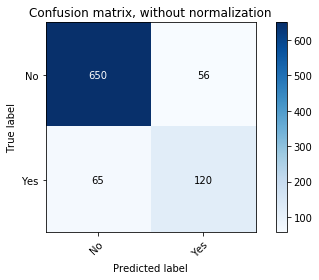

In [60]:
plot_confusion_matrix(val_y, preds, classes=class_names, title='Confusion matrix, without normalization')

Confusion matrix for the model with lowered threshold

Confusion matrix, without normalization
[[582 124]
 [ 50 135]]


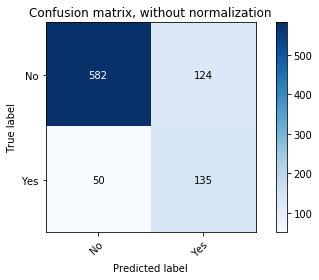

In [61]:
plot_confusion_matrix(val_y, predicted, classes=class_names, title='Confusion matrix, without normalization')

So while tuning the parameters we were able to reduce the False Negative values.
Now to predict our possible customers we use the False Positives as a measure. These False Positives are the users whose leads are similar to a user who actually made a purchase. These False Positives are false as they havent made a purchase yet and were labelled as a 'No' by us.

In [62]:
print(model.feature_importances_)

[1.22e-01 1.03e-01 7.20e-02 8.68e-02 6.77e-02 1.44e-02 7.79e-03 8.95e-04
 1.21e-03 1.02e-05 8.84e-02 4.07e-02 1.70e-02 1.75e-02 1.84e-02 6.04e-02
 2.63e-02 1.45e-02 1.24e-02 8.05e-03 8.15e-02 4.98e-02 3.58e-02 2.20e-02
 3.08e-02]


### Listing the predicted users

In [63]:
actual = val_y
answer = pd.DataFrame({'id':test_ids,'actual':actual,'predicted':predicted})

In [64]:
False_positives =  answer[(answer['actual']==0)&(answer['predicted']==1)]

In [65]:
False_positives

,id,actual,predicted
1,8894e66d4a4e1570,0,1
5,65ed96144318941d,0,1
19,1ed623113e7a8e18,0,1
21,74afa2fe61be9b23,0,1
31,a830d935b485536d,0,1
38,f37b4f646772358a,0,1
40,548479fa8a7447de,0,1
58,5aaddac757c76494,0,1
65,2bd626d474f4f6e5,0,1
72,29e61645180704d0,0,1
